<h1> <center> <font color='blue'>CIB - Credict Card Default Prediction!

## Table of Contents
* ### [Introduction: Business Problem](#introduction)
* ### [Importing Libraries](#importing)

* ### [Reading Dataset](#reading)

* ### [Data Filtering/Analysis](#analysis)
    * #### [Checking Data Types](#dtypes)
    * #### [Renaming Columns](#renaming)
    * #### [Changing Some Data](#wrangling)
    * #### [Dropping Columns](#dropping)
    * #### [Data.Describe](#describe)
    * #### [Checking NANs](#nans)
    * #### [P-Value & Pearson Coef.](#pvalue)
            

* ### [Visualizing Data](#visual)
    * #### [Gender-Marriage/Age Box Plot](#gmabx)
    * #### [Gender-Marriage/Default Box Plot](#gmdbx)
    * #### [Average Balance Over Time Line Plot](#abotlp)
    * #### [Average Payment Over Time Line Plot](#apotlp)
    * #### [Parameters Correlation Heat Map](#parhp)
    * #### [PAY_NO Correlation Heat Map](#anhp)
    
* ### [Forecasting](#forecast)
    * #### [Regression](#reg)
        * [Multiple Linear Regression](#mlr)
    * #### [Classification](#class)
        * [Logistic Regression](#lor)
        * [Support Vector Machine](#svm)
        * [K-Nearest Neighbour](#knn)
        * [Decision Tree](#dt)
        * [Random Forest](#rf)
    
            
* ### [Results](#results)
    * #### [Confusion Matrix](#conf)
    * #### [Optimization](#opt)
    * #### [Hyperparamter Tuning](#hyp)
* ### [Discussion](#disc)


<hr>



# Introduction: Business Problem <a name="introduction"></a>

In this case study we will try to find an optimal solution for Credit Cards Default. Specifically, this report will be targeted to risk managment to make decisions.
Default is the delay of clients to pay their dept for six months, here in this notebook I am trying to tackle this problem by applying more than one model and predict which is more efficient to give acccurat prediction.

# Importing Libraries <a name="importing"></a>

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Time Library
import time
from time import process_time

# Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotly.express as px

# Modeling
from sklearn.inspection import permutation_importance
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,\
roc_auc_score, roc_curve, precision_recall_curve, fbeta_score, recall_score,\
precision_recall_fscore_support

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)
from sklearn.metrics import accuracy_score, make_scorer, log_loss

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from mlxtend.plotting import plot_decision_regions

# Reading Datasets <a name="reading"></a>

In [2]:
df = pd.read_csv('CCS.csv')

print('CCs.csv read into a dataframe!')

CCs.csv read into a dataframe!


# Data Filtering/Analysis <a name="analysis"></a>

## Checking Data Types<a name="dtypes"></a>

In [3]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## Renaming Columns<a name="renaming"></a>

In [4]:
df.rename(columns={'PAY_0':'PAY_SEP', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JUL', 'PAY_4':'PAY_JUN', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APR',
                   'BILL_AMT1':'BILL_AMT_SEP', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JUL', 'BILL_AMT4':'BILL_AMT_JUN', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APR',
                   'PAY_AMT1':'PAY_AMT_SEP', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JUL', 'PAY_AMT4':'PAY_AMT_JUN', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APR', 
                   'default.payment.next.month':'Default'
                  },
              inplace=True)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0   1    20000.0    2          2         1   24        2        2       -1   
1   2   120000.0    2          2         2   26       -1        2        0   
2   3    90000.0    2          2         2   34        0        0        0   
3   4    50000.0    2          2         1   37        0        0        0   
4   5    50000.0    1          2         1   57       -1        0       -1   

   PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEP  \
0       -1  ...           0.0           0.0           0.0          0.0   
1        0  ...        3272.0        3455.0        3261.0          0.0   
2        0  ...       14331.0       14948.0       15549.0       1518.0   
3        0  ...       28314.0       28959.0       29547.0       2000.0   
4        0  ...       20940.0       19146.0       19131.0       2000.0   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Default  
0        689.0          0.0          0.0          0.0          0.0        1  
1       1000.0       1000.0       1000.0          0.0       2000.0        1  
2       1500.0       1000.0       1000.0       1000.0       5000.0        0  
3       2019.0       1200.0       1100.0       1069.0       1000.0        0  
4      36681.0      10000.0       9000.0        689.0        679.0        0  

[5 rows x 25 columns]

## Changing Some Data<a name="wrangling"></a>

In [5]:
PAY_MONTH = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL',
             'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for month in PAY_MONTH:
    print(sorted(df[month].unique()))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


#### Changing the ranges of PAY_no to significant values with range from 0-10

In [6]:
df['PAY_SEP'].replace(to_replace=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                      value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df['PAY_AUG'].replace(to_replace=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                      value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df['PAY_JUL'].replace(to_replace=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                      value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df['PAY_JUN'].replace(to_replace=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                      value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df['PAY_MAY'].replace(to_replace=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                      value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df['PAY_APR'].replace(to_replace=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                      value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

reg_df = df.copy()

In [128]:
COLUMNS = ['EDUCATION', 'SEX', 'MARRIAGE']
for i in COLUMNS:
    print(sorted(df[i].unique()))

[0, 1, 2, 3, 4, 5, 6]
[1, 2]
[0, 1, 2, 3]


C:\Users\ahmed\anaconda3\envs\R and Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\ahmed\anaconda3\envs\R and Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\ahmed\anaconda3\envs\R and Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

C:\Users\ahmed\anaconda3\envs\R and Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\ahmed\anaconda3\envs\R and Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\ahmed\anaconda3\envs\R and Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

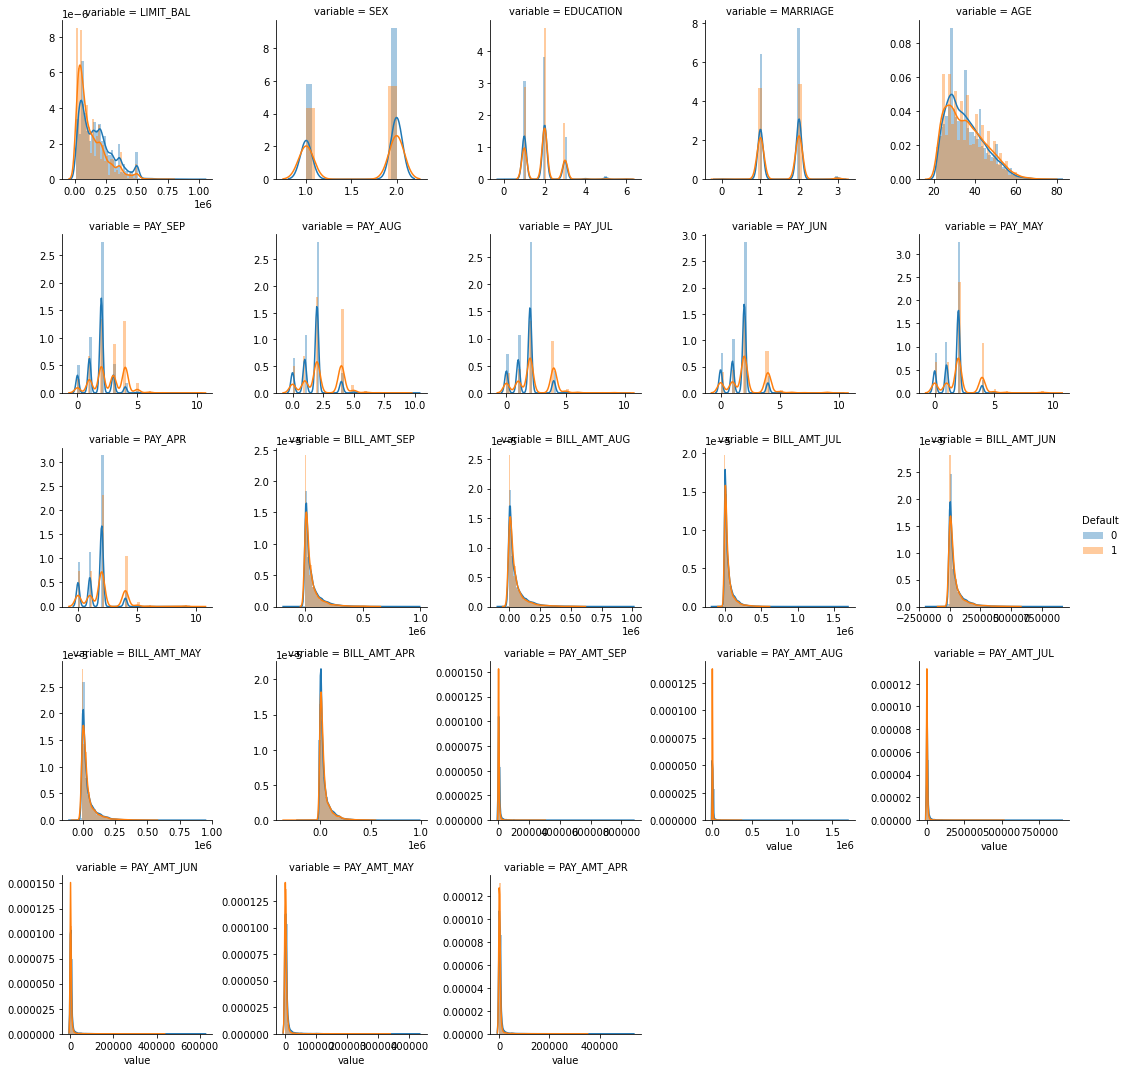

In [12]:
output = 'Default'
cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove(output)
f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

#### Changing 'Sex', 'Education', 'Marriage' to it's significant meanings

In [129]:
# Sex, education, and marriage should be categorical columns
df['SEX'].replace(to_replace=[1, 2], value=['Male', 'Female'], inplace=True)

df['EDUCATION'].replace(to_replace=[1, 2, 3, 4, 5, 6, 0],
                        value=['Graduate', 'University', 'HighSchool', 'Others', 'UnKnown', 'UnKnown', 'UnKnown'],
                        inplace=True)

df['MARRIAGE'].replace(to_replace=[1, 2, 3, 0], value=['Married', 'Single', 'Others', 'Others'], inplace=True)

## Dropping Columns<a name="dropping"></a>

#### Dropping ID column as it is irrelivant as it is only the rows number

In [130]:
df.drop(['ID'], axis=1, inplace=True)
reg_df.drop(['ID'], axis=1, inplace=True)

In [131]:
reg_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24        4        4        1   
1   120000.0    2          2         2   26        1        4        2   
2    90000.0    2          2         2   34        2        2        2   
3    50000.0    2          2         1   37        2        2        2   
4    50000.0    1          2         1   57        1        2        1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0        1        0  ...           0.0           0.0           0.0   
1        2        2  ...        3272.0        3455.0        3261.0   
2        2        2  ...       14331.0       14948.0       15549.0   
3        2        2  ...       28314.0       28959.0       29547.0   
4        2        2  ...       20940.0       19146.0       19131.0   

   PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0          0.0        689.0          0.0          0.0          0.0   
1          0.0       1000.0       1000.0       1000.0          0.0   
2       1518.0       1500.0       1000.0       1000.0       1000.0   
3       2000.0       2019.0       1200.0       1100.0       1069.0   
4       2000.0      36681.0      10000.0       9000.0        689.0   

   PAY_AMT_APR  Default  
0          0.0        1  
1       2000.0        1  
2       5000.0        0  
3       1000.0        0  
4        679.0        0  

[5 rows x 24 columns]

In [132]:
df.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0    20000.0  Female  University  Married   24        4        4        1   
1   120000.0  Female  University   Single   26        1        4        2   
2    90000.0  Female  University   Single   34        2        2        2   
3    50000.0  Female  University  Married   37        2        2        2   
4    50000.0    Male  University  Married   57        1        2        1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0        1        0  ...           0.0           0.0           0.0   
1        2        2  ...        3272.0        3455.0        3261.0   
2        2        2  ...       14331.0       14948.0       15549.0   
3        2        2  ...       28314.0       28959.0       29547.0   
4        2        2  ...       20940.0       19146.0       19131.0   

   PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0          0.0        689.0          0.0          0.0          0.0   
1          0.0       1000.0       1000.0       1000.0          0.0   
2       1518.0       1500.0       1000.0       1000.0       1000.0   
3       2000.0       2019.0       1200.0       1100.0       1069.0   
4       2000.0      36681.0      10000.0       9000.0        689.0   

   PAY_AMT_APR  Default  
0          0.0        1  
1       2000.0        1  
2       5000.0        0  
3       1000.0        0  
4        679.0        0  

[5 rows x 24 columns]

## Data.Describe<a name="describe"></a>

In [133]:
# This method will provide various summary statistics, excluding NaN (Not a Number) values.
df.describe().T

count           mean            std       min       25%  \
LIMIT_BAL     30000.0  167484.322667  129747.661567   10000.0  50000.00   
AGE           30000.0      35.485500       9.217904      21.0     28.00   
PAY_SEP       30000.0       1.983300       1.123802       0.0      1.00   
PAY_AUG       30000.0       1.866233       1.197186       0.0      1.00   
PAY_JUL       30000.0       1.833800       1.196868       0.0      1.00   
PAY_JUN       30000.0       1.779333       1.169139       0.0      1.00   
PAY_MAY       30000.0       1.733800       1.133187       0.0      1.00   
PAY_APR       30000.0       1.708900       1.149988       0.0      1.00   
BILL_AMT_SEP  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT_AUG  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT_JUL  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT_JUN  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT_MAY  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT_APR  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT_SEP   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT_AUG   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT_JUL   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT_JUN   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT_MAY   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT_APR   30000.0    5215.502567   17777.465775       0.0    117.75   
Default       30000.0       0.221200       0.415062       0.0      0.00   

                   50%        75%        max  
LIMIT_BAL     140000.0  240000.00  1000000.0  
AGE               34.0      41.00       79.0  
PAY_SEP            2.0       2.00       10.0  
PAY_AUG            2.0       2.00       10.0  
PAY_JUL            2.0       2.00       10.0  
PAY_JUN            2.0       2.00       10.0  
PAY_MAY            2.0       2.00       10.0  
PAY_APR            2.0       2.00       10.0  
BILL_AMT_SEP   22381.5   67091.00   964511.0  
BILL_AMT_AUG   21200.0   64006.25   983931.0  
BILL_AMT_JUL   20088.5   60164.75  1664089.0  
BILL_AMT_JUN   19052.0   54506.00   891586.0  
BILL_AMT_MAY   18104.5   50190.50   927171.0  
BILL_AMT_APR   17071.0   49198.25   961664.0  
PAY_AMT_SEP     2100.0    5006.00   873552.0  
PAY_AMT_AUG     2009.0    5000.00  1684259.0  
PAY_AMT_JUL     1800.0    4505.00   896040.0  
PAY_AMT_JUN     1500.0    4013.25   621000.0  
PAY_AMT_MAY     1500.0    4031.50   426529.0  
PAY_AMT_APR     1500.0    4000.00   528666.0  
Default            0.0       0.00        1.0

## Checking NaNs<a name="nans"></a>

In [134]:
df.isna().sum()

LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_SEP         0
PAY_AUG         0
PAY_JUL         0
PAY_JUN         0
PAY_MAY         0
PAY_APR         0
BILL_AMT_SEP    0
BILL_AMT_AUG    0
BILL_AMT_JUL    0
BILL_AMT_JUN    0
BILL_AMT_MAY    0
BILL_AMT_APR    0
PAY_AMT_SEP     0
PAY_AMT_AUG     0
PAY_AMT_JUL     0
PAY_AMT_JUN     0
PAY_AMT_MAY     0
PAY_AMT_APR     0
Default         0
dtype: int64

## P-Value & Pearson Coef.<a name="pvalue"></a>

In [135]:
COLUMNS = reg_df.drop(["Default"], axis=1)
p_list= []
pearson_list = []
for i in COLUMNS:
    pearson_coef, p_value = stats.pearsonr(reg_df[i], reg_df['Default'])
    p_list.append(p_value)
    pearson_list.append(pearson_coef)
    print('The Pearson Correlation Coefficient for ' + f'{i}' + " is", np.round(pearson_coef, 5), " with a P-value of P =", np.round(p_value, 5))  

stats = pd.DataFrame(list(zip(COLUMNS, p_list, pearson_list)), columns =['Attributes', 'P_Value', 'Pearson_Coef'])

The Pearson Correlation Coefficient for LIMIT_BAL is -0.15352  with a P-value of P = 0.0
The Pearson Correlation Coefficient for SEX is -0.03996  with a P-value of P = 0.0
The Pearson Correlation Coefficient for EDUCATION is 0.02801  with a P-value of P = 0.0
The Pearson Correlation Coefficient for MARRIAGE is -0.02434  with a P-value of P = 2e-05
The Pearson Correlation Coefficient for AGE is 0.01389  with a P-value of P = 0.01614
The Pearson Correlation Coefficient for PAY_SEP is 0.32479  with a P-value of P = 0.0
The Pearson Correlation Coefficient for PAY_AUG is 0.26355  with a P-value of P = 0.0
The Pearson Correlation Coefficient for PAY_JUL is 0.23525  with a P-value of P = 0.0
The Pearson Correlation Coefficient for PAY_JUN is 0.21661  with a P-value of P = 0.0
The Pearson Correlation Coefficient for PAY_MAY is 0.20415  with a P-value of P = 0.0
The Pearson Correlation Coefficient for PAY_APR is 0.18687  with a P-value of P = 0.0
The Pearson Correlation Coefficient for BILL_AMT

In [136]:
stats

Attributes        P_Value  Pearson_Coef
0      LIMIT_BAL  1.302244e-157     -0.153520
1            SEX   4.395249e-12     -0.039961
2      EDUCATION   1.225038e-06      0.028006
3       MARRIAGE   2.485364e-05     -0.024339
4            AGE   1.613685e-02      0.013890
5        PAY_SEP   0.000000e+00      0.324794
6        PAY_AUG   0.000000e+00      0.263551
7        PAY_JUL   0.000000e+00      0.235253
8        PAY_JUN  1.899297e-315      0.216614
9        PAY_MAY  1.126608e-279      0.204149
10       PAY_APR  7.296740e-234      0.186866
11  BILL_AMT_SEP   6.673295e-04     -0.019644
12  BILL_AMT_AUG   1.395736e-02     -0.014193
13  BILL_AMT_JUL   1.476998e-02     -0.014076
14  BILL_AMT_JUN   7.855564e-02     -0.010156
15  BILL_AMT_MAY   2.416344e-01     -0.006760
16  BILL_AMT_APR   3.521225e-01     -0.005372
17   PAY_AMT_SEP   1.146488e-36     -0.072929
18   PAY_AMT_AUG   3.166657e-24     -0.058579
19   PAY_AMT_JUL   1.841770e-22     -0.056250
20   PAY_AMT_JUN   6.830942e-23     -0.056827
21   PAY_AMT_MAY   1.241345e-21     -0.055124
22   PAY_AMT_APR   3.033589e-20     -0.053183

In [137]:
stats.sort_values("P_Value")

Attributes        P_Value  Pearson_Coef
5        PAY_SEP   0.000000e+00      0.324794
6        PAY_AUG   0.000000e+00      0.263551
7        PAY_JUL   0.000000e+00      0.235253
8        PAY_JUN  1.899297e-315      0.216614
9        PAY_MAY  1.126608e-279      0.204149
10       PAY_APR  7.296740e-234      0.186866
0      LIMIT_BAL  1.302244e-157     -0.153520
17   PAY_AMT_SEP   1.146488e-36     -0.072929
18   PAY_AMT_AUG   3.166657e-24     -0.058579
20   PAY_AMT_JUN   6.830942e-23     -0.056827
19   PAY_AMT_JUL   1.841770e-22     -0.056250
21   PAY_AMT_MAY   1.241345e-21     -0.055124
22   PAY_AMT_APR   3.033589e-20     -0.053183
1            SEX   4.395249e-12     -0.039961
2      EDUCATION   1.225038e-06      0.028006
3       MARRIAGE   2.485364e-05     -0.024339
11  BILL_AMT_SEP   6.673295e-04     -0.019644
12  BILL_AMT_AUG   1.395736e-02     -0.014193
13  BILL_AMT_JUL   1.476998e-02     -0.014076
4            AGE   1.613685e-02      0.013890
14  BILL_AMT_JUN   7.855564e-02     -0.010156
15  BILL_AMT_MAY   2.416344e-01     -0.006760
16  BILL_AMT_APR   3.521225e-01     -0.005372

In [18]:
indexNames = stats[stats['Pearson_Coef'] < 0 ].index
stats.drop(indexNames , inplace=True)

In [19]:
stats

Attributes        P_Value  Pearson_Coef
2   EDUCATION   1.225038e-06      0.028006
4         AGE   1.613685e-02      0.013890
5     PAY_SEP   0.000000e+00      0.324794
6     PAY_AUG   0.000000e+00      0.263551
7     PAY_JUL   0.000000e+00      0.235253
8     PAY_JUN  1.899297e-315      0.216614
9     PAY_MAY  1.126608e-279      0.204149
10    PAY_APR  7.296740e-234      0.186866

# Visualizing Data<a name="visual"></a>

## Gender-Marriage/Age Box Plot<a name="gmabx"></a>

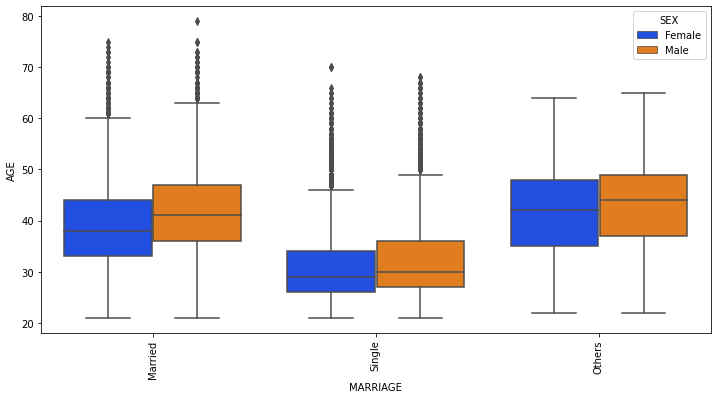

In [150]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=df, palette='bright')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('MARRIAGE', 'AGE', 'SEX', 12)

## Limit Balance-Marriage/Default Box Plot<a name="gmdbx"></a>

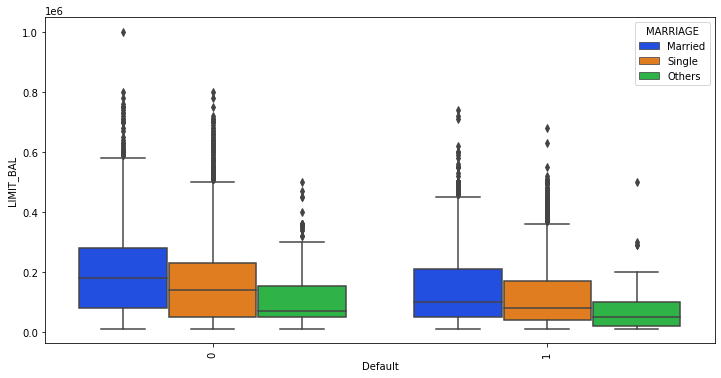

In [151]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=df, palette='bright')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('Default', 'LIMIT_BAL', 'MARRIAGE', 12)

## Average Balance Over Time Line Plot<a name="abotlp"></a>

In [23]:
# Average balance over time
bal_months = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN',
              'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']
avg_bal = []

for month in bal_months:
    avg_bal.append(df[month].mean())
    
fig = px.line(x=bal_months, y=avg_bal, title='Average Balance Over Time (EGP)')
fig.show()

## Average Payment Over Time Line Plot<a name="apotlp"></a>

In [24]:
# Average payment over time
monthly_payments = ['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
                    'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP']
avg_pmt = []

for month in monthly_payments:
    avg_pmt.append(df[month].mean())
    
fig = px.line(x=monthly_payments, y=avg_pmt, title='Average Payment Over Time (EGP)')
fig.show()

## Parameters Correlation Heat Map<a name="parhp"></a>

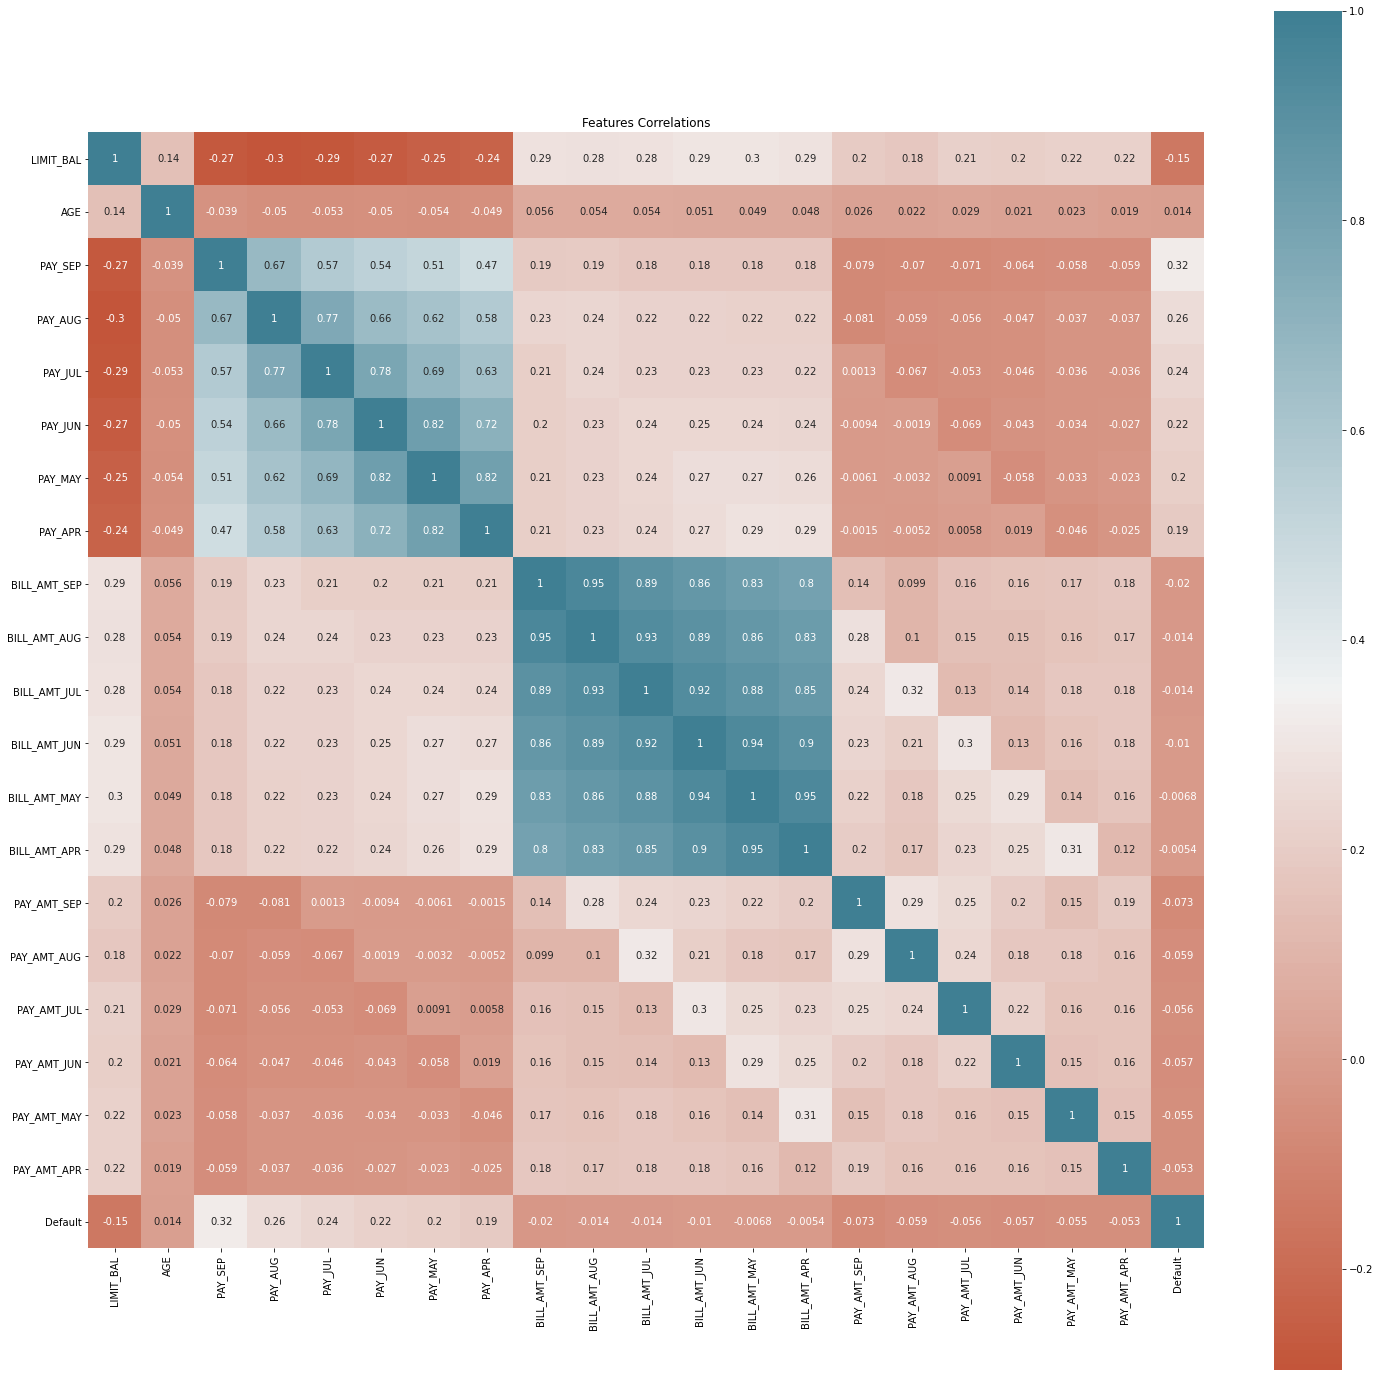

In [25]:
# Correlation Plot
plt.figure(figsize=(25,25))
plt.title('Features Correlations')
sns.heatmap(df.corr(), annot = True, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show();

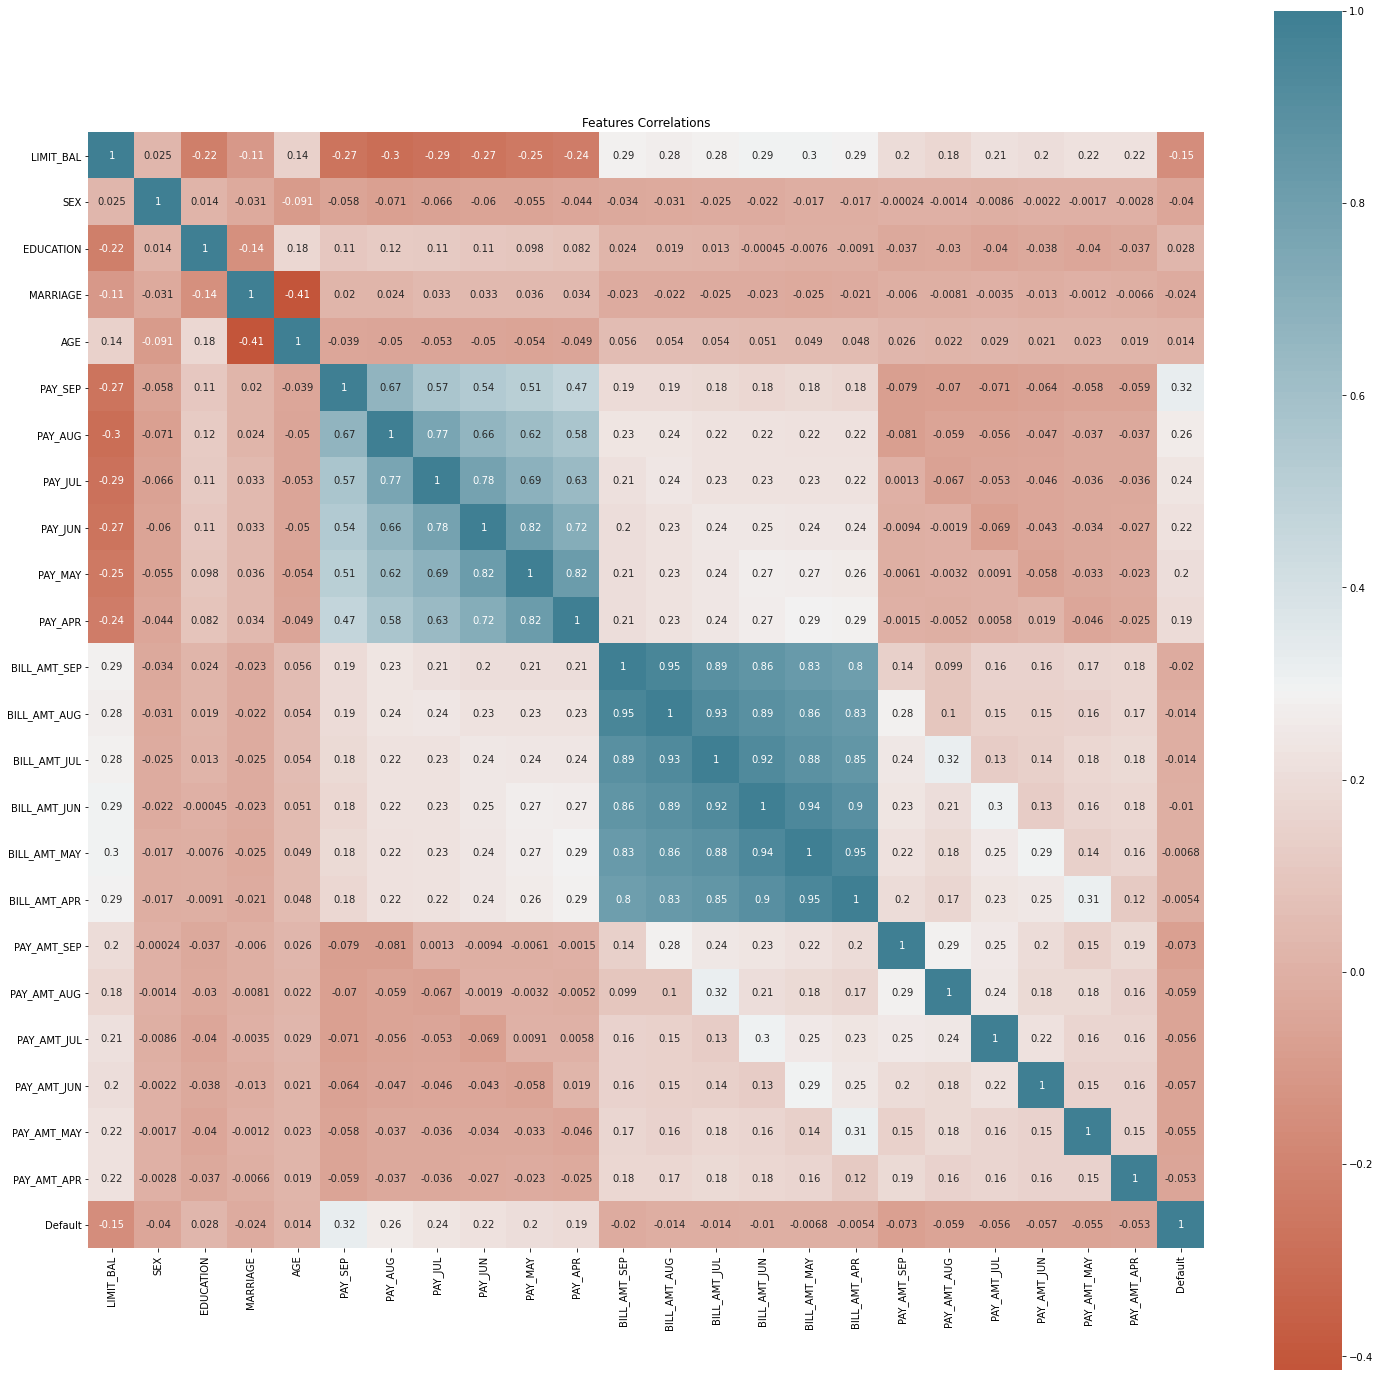

In [26]:
# Correlation Plot
plt.figure(figsize=(25,25))
plt.title('Features Correlations')
sns.heatmap(reg_df.corr(), annot = True, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show();

## PAY_NO Correlation Heat Map<a name="panhp"></a>

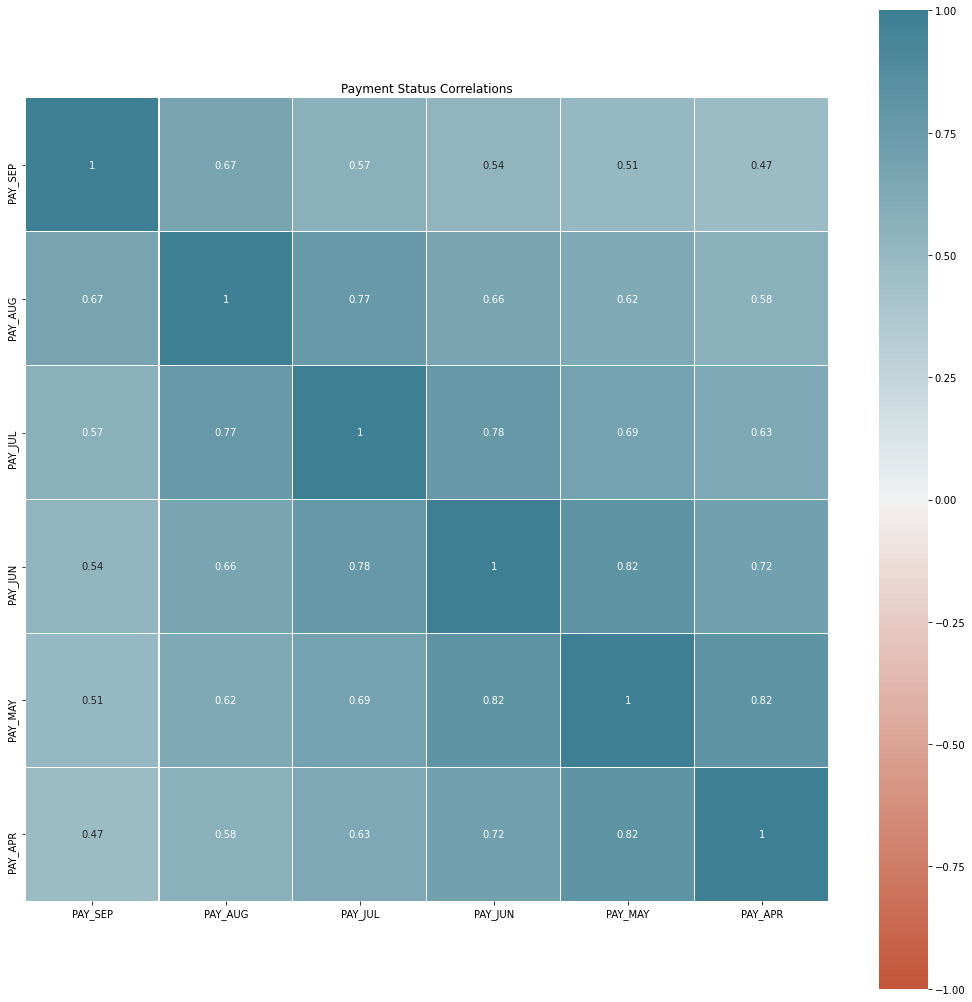

In [29]:
# Correlation Plot

plt.figure(figsize=(18,18))
plt.title('Payment Status Correlations')
corr = df[PAY_MONTH].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, vmin=-1, vmax=1,
            annot = True, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show();

# Forecastting<a name="forecast"></a>

## Regression<a name="reg"></a>

### Multiple Linear Regression<a name="mlr"></a>

In [30]:
X = reg_df.drop(["Default"], axis=1)
#X = df[["EDUCATION", "AGE", "PAY_SEP", "PAY_AUG", "PAY_JUL", "PAY_JUN", "PAY_MAY", "PAY_APR"]]
y = reg_df["Default"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [189]:
from sklearn import linear_model

t_start = process_time()
model = linear_model.LinearRegression()
regr = model.fit(X,y)
default_y_pred = regr.predict(X_test)
t_stop = process_time()

print(f'MLP accuracy score: {regr.score(X,y)}')
print(f'MLP elapsed time: {t_stop-t_start}\n')

MLP accuracy score: 0.12477544309845967
MLP elapsed time: 0.046875



In [36]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, default_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, default_y_pred))

Coefficients: 
 [-9.05316482e-08 -1.45313763e-02 -1.51273575e-02 -2.38215135e-02
  1.40949931e-03  9.57054669e-02  1.94561569e-02  1.16741658e-02
  3.36189863e-03  5.69939979e-03  7.92019704e-04 -6.22465927e-07
  1.58703031e-07  3.00530071e-08 -6.79349887e-08 -2.04872291e-08
  1.15259313e-07 -7.43691308e-07 -2.09190755e-07 -2.87353920e-08
 -2.52077019e-07 -3.40958059e-07 -9.76977762e-08]
Mean squared error: 0.15
Coefficient of determination: 0.13


## Classification<a name="class"></a>

In [37]:
column_name = list(df.select_dtypes('int64').columns)
for column in column_name:
    df[column] = df[column].astype(np.float64)

df

LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_SEP  PAY_AUG  \
0        20000.0  Female  University  Married  24.0      4.0      4.0   
1       120000.0  Female  University   Single  26.0      1.0      4.0   
2        90000.0  Female  University   Single  34.0      2.0      2.0   
3        50000.0  Female  University  Married  37.0      2.0      2.0   
4        50000.0    Male  University  Married  57.0      1.0      2.0   
...          ...     ...         ...      ...   ...      ...      ...   
29995   220000.0    Male  HighSchool  Married  39.0      2.0      2.0   
29996   150000.0    Male  HighSchool   Single  43.0      1.0      1.0   
29997    30000.0    Male  University   Single  37.0      6.0      5.0   
29998    80000.0    Male  HighSchool  Married  41.0      3.0      1.0   
29999    50000.0    Male  University  Married  46.0      2.0      2.0   

       PAY_JUL  PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  \
0          1.0      1.0      0.0  ...           0.0           0.0   
1          2.0      2.0      2.0  ...        3272.0        3455.0   
2          2.0      2.0      2.0  ...       14331.0       14948.0   
3          2.0      2.0      2.0  ...       28314.0       28959.0   
4          1.0      2.0      2.0  ...       20940.0       19146.0   
...        ...      ...      ...  ...           ...           ...   
29995      2.0      2.0      2.0  ...       88004.0       31237.0   
29996      1.0      1.0      2.0  ...        8979.0        5190.0   
29997      4.0      1.0      2.0  ...       20878.0       20582.0   
29998      2.0      2.0      2.0  ...       52774.0       11855.0   
29999      2.0      2.0      2.0  ...       36535.0       32428.0   

       BILL_AMT_APR  PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0               0.0          0.0        689.0          0.0          0.0   
1            3261.0          0.0       1000.0       1000.0       1000.0   
2           15549.0       1518.0       1500.0       1000.0       1000.0   
3           29547.0       2000.0       2019.0       1200.0       1100.0   
4           19131.0       2000.0      36681.0      10000.0       9000.0   
...             ...          ...          ...          ...          ...   
29995       15980.0       8500.0      20000.0       5003.0       3047.0   
29996           0.0       1837.0       3526.0       8998.0        129.0   
29997       19357.0          0.0          0.0      22000.0       4200.0   
29998       48944.0      85900.0       3409.0       1178.0       1926.0   
29999       15313.0       2078.0       1800.0       1430.0       1000.0   

       PAY_AMT_MAY  PAY_AMT_APR  Default  
0              0.0          0.0      1.0  
1              0.0       2000.0      1.0  
2           1000.0       5000.0      0.0  
3           1069.0       1000.0      0.0  
4            689.0        679.0      0.0  
...            ...          ...      ...  
29995       5000.0       1000.0      0.0  
29996          0.0          0.0      0.0  
29997       2000.0       3100.0      1.0  
29998      52964.0       1804.0      1.0  
29999       1000.0       1000.0      1.0  

[30000 rows x 24 columns]

In [38]:
X = df.drop(["Default"], axis=1)
y = df["Default"]

In [39]:
categoricals = list(X.select_dtypes('object').columns)
numericals = list(X.select_dtypes('float64').columns)

def encode_cats(categoricals, numericals):
    """
    Takes in a list of categorical columns and a list of numerical columns and returns the dataframe with encoded variables
    """
    ohe = OneHotEncoder(sparse=False, drop='first')
    cat_matrix = ohe.fit_transform(X.loc[:, categoricals])
    X_ohe = pd.DataFrame(cat_matrix,
                         columns=ohe.get_feature_names(categoricals), #create meaningful column names
                         index=X.index) #keep the same index values
    
    return pd.concat([X.loc[:, numericals], X_ohe], axis=1)

In [40]:
X = encode_cats(categoricals, numericals)
X

LIMIT_BAL   AGE  PAY_SEP  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0        20000.0  24.0      4.0      4.0      1.0      1.0      0.0      0.0   
1       120000.0  26.0      1.0      4.0      2.0      2.0      2.0      4.0   
2        90000.0  34.0      2.0      2.0      2.0      2.0      2.0      2.0   
3        50000.0  37.0      2.0      2.0      2.0      2.0      2.0      2.0   
4        50000.0  57.0      1.0      2.0      1.0      2.0      2.0      2.0   
...          ...   ...      ...      ...      ...      ...      ...      ...   
29995   220000.0  39.0      2.0      2.0      2.0      2.0      2.0      2.0   
29996   150000.0  43.0      1.0      1.0      1.0      1.0      2.0      2.0   
29997    30000.0  37.0      6.0      5.0      4.0      1.0      2.0      2.0   
29998    80000.0  41.0      3.0      1.0      2.0      2.0      2.0      1.0   
29999    50000.0  46.0      2.0      2.0      2.0      2.0      2.0      2.0   

       BILL_AMT_SEP  BILL_AMT_AUG  ...  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0            3913.0        3102.0  ...          0.0          0.0          0.0   
1            2682.0        1725.0  ...       1000.0          0.0       2000.0   
2           29239.0       14027.0  ...       1000.0       1000.0       5000.0   
3           46990.0       48233.0  ...       1100.0       1069.0       1000.0   
4            8617.0        5670.0  ...       9000.0        689.0        679.0   
...             ...           ...  ...          ...          ...          ...   
29995      188948.0      192815.0  ...       3047.0       5000.0       1000.0   
29996        1683.0        1828.0  ...        129.0          0.0          0.0   
29997        3565.0        3356.0  ...       4200.0       2000.0       3100.0   
29998       -1645.0       78379.0  ...       1926.0      52964.0       1804.0   
29999       47929.0       48905.0  ...       1000.0       1000.0       1000.0   

       SEX_Male  EDUCATION_HighSchool  EDUCATION_Others  EDUCATION_UnKnown  \
0           0.0                   0.0               0.0                0.0   
1           0.0                   0.0               0.0                0.0   
2           0.0                   0.0               0.0                0.0   
3           0.0                   0.0               0.0                0.0   
4           1.0                   0.0               0.0                0.0   
...         ...                   ...               ...                ...   
29995       1.0                   1.0               0.0                0.0   
29996       1.0                   1.0               0.0                0.0   
29997       1.0                   0.0               0.0                0.0   
29998       1.0                   1.0               0.0                0.0   
29999       1.0                   0.0               0.0                0.0   

       EDUCATION_University  MARRIAGE_Others  MARRIAGE_Single  
0                       1.0              0.0              0.0  
1                       1.0              0.0              1.0  
2                       1.0              0.0              1.0  
3                       1.0              0.0              0.0  
4                       1.0              0.0              0.0  
...                     ...              ...              ...  
29995                   0.0              0.0              0.0  
29996                   0.0              0.0              1.0  
29997                   1.0              0.0              1.0  
29998                   0.0              0.0              0.0  
29999                   1.0              0.0              0.0  

[30000 rows x 27 columns]

In [41]:
X.describe().T

count           mean            std       min  \
LIMIT_BAL             30000.0  167484.322667  129747.661567   10000.0   
AGE                   30000.0      35.485500       9.217904      21.0   
PAY_SEP               30000.0       1.983300       1.123802       0.0   
PAY_AUG               30000.0       1.866233       1.197186       0.0   
PAY_JUL               30000.0       1.833800       1.196868       0.0   
PAY_JUN               30000.0       1.779333       1.169139       0.0   
PAY_MAY               30000.0       1.733800       1.133187       0.0   
PAY_APR               30000.0       1.708900       1.149988       0.0   
BILL_AMT_SEP          30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT_AUG          30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT_JUL          30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT_JUN          30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT_MAY          30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT_APR          30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT_SEP           30000.0    5663.580500   16563.280354       0.0   
PAY_AMT_AUG           30000.0    5921.163500   23040.870402       0.0   
PAY_AMT_JUL           30000.0    5225.681500   17606.961470       0.0   
PAY_AMT_JUN           30000.0    4826.076867   15666.159744       0.0   
PAY_AMT_MAY           30000.0    4799.387633   15278.305679       0.0   
PAY_AMT_APR           30000.0    5215.502567   17777.465775       0.0   
SEX_Male              30000.0       0.396267       0.489129       0.0   
EDUCATION_HighSchool  30000.0       0.163900       0.370191       0.0   
EDUCATION_Others      30000.0       0.004100       0.063901       0.0   
EDUCATION_UnKnown     30000.0       0.011500       0.106621       0.0   
EDUCATION_University  30000.0       0.467667       0.498962       0.0   
MARRIAGE_Others       30000.0       0.012567       0.111396       0.0   
MARRIAGE_Single       30000.0       0.532133       0.498975       0.0   

                           25%       50%        75%        max  
LIMIT_BAL             50000.00  140000.0  240000.00  1000000.0  
AGE                      28.00      34.0      41.00       79.0  
PAY_SEP                   1.00       2.0       2.00       10.0  
PAY_AUG                   1.00       2.0       2.00       10.0  
PAY_JUL                   1.00       2.0       2.00       10.0  
PAY_JUN                   1.00       2.0       2.00       10.0  
PAY_MAY                   1.00       2.0       2.00       10.0  
PAY_APR                   1.00       2.0       2.00       10.0  
BILL_AMT_SEP           3558.75   22381.5   67091.00   964511.0  
BILL_AMT_AUG           2984.75   21200.0   64006.25   983931.0  
BILL_AMT_JUL           2666.25   20088.5   60164.75  1664089.0  
BILL_AMT_JUN           2326.75   19052.0   54506.00   891586.0  
BILL_AMT_MAY           1763.00   18104.5   50190.50   927171.0  
BILL_AMT_APR           1256.00   17071.0   49198.25   961664.0  
PAY_AMT_SEP            1000.00    2100.0    5006.00   873552.0  
PAY_AMT_AUG             833.00    2009.0    5000.00  1684259.0  
PAY_AMT_JUL             390.00    1800.0    4505.00   896040.0  
PAY_AMT_JUN             296.00    1500.0    4013.25   621000.0  
PAY_AMT_MAY             252.50    1500.0    4031.50   426529.0  
PAY_AMT_APR             117.75    1500.0    4000.00   528666.0  
SEX_Male                  0.00       0.0       1.00        1.0  
EDUCATION_HighSchool      0.00       0.0       0.00        1.0  
EDUCATION_Others          0.00       0.0       0.00        1.0  
EDUCATION_UnKnown         0.00       0.0       0.00        1.0  
EDUCATION_University      0.00       0.0       1.00        1.0  
MARRIAGE_Others           0.00       0.0       0.00        1.0  
MARRIAGE_Single           0.00       1.0       1.00        1.0

### Data Splitting

In [42]:
def train_test_val_split(X, y):
    """
    Input: X --> array of features, y --> target array
           set aside for testing.
    Output: Features and target split into train, val and test sets. 
            Test size = 20%
            Val size = 25%
            Converted to numpy arrays.
    """
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Split train/validate sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

    # Convert to numpy arrays to help with generate indeces below
    X, y = np.array(X), np.array(y)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [43]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, y)

In [44]:
def scale_data(X_train, X_val, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled

In [45]:
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)

In [46]:
def model_score(model_name, model, X_train_scaled, X_val_scaled,
                X_test_scaled, y_train, y_val, y_test, test=False):
    """
    Input: Transformed feature and target sets
    Output: Validation scores. If test=True, includes test scores
    """
    t_start = process_time()
    print('Calculating validation score...')

    my_model = model
    my_model.fit(X_train_scaled,y_train)
    t_stop = process_time()
    print(f'{model_name} accuracy score: {my_model.score(X_val_scaled,y_val):.3}')
    print(f'{model_name} elapsed time: {t_stop-t_start}\n')

    if test:
        print("Calculating test score...")
        print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.3}\n')

    return my_model

In [104]:
print('Shape of X training set {}'.format(X_train_scaled.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (18000, 27) &  Size of Y training set (18000,)


In [105]:
print('Shape of X training set {}'.format(X_val_scaled.shape),'&',' Size of Y training set {}'.format(y_val.shape))

Shape of X training set (6000, 27) &  Size of Y training set (6000,)


In [106]:
print('Shape of X training set {}'.format(X_test_scaled.shape),'&',' Size of Y training set {}'.format(y_test.shape))

Shape of X training set (6000, 27) &  Size of Y training set (6000,)


### Logistic Regression<a name="lor"></a>

In [47]:
lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Calculating validation score...
LogReg accuracy score: 0.8158
LogReg elapsed time: 0.1875



### Support Vector Machine<a name="svm"></a>

In [48]:
svm = model_score('SVM', SVC(probability=True),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Calculating validation score...
SVM accuracy score: 0.82
SVM elapsed time: 76.578125



### K-Nearest Neighbour<a name="knn"></a>

In [49]:
knn = model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Calculating validation score...
KNN accuracy score: 0.7962
KNN elapsed time: 0.15625



### Decision Tree<a name="dt"></a>

In [107]:
dt = model_score('KNN', DecisionTreeClassifier(criterion="entropy"),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Calculating validation score...
KNN accuracy score: 0.7373
KNN elapsed time: 0.46875



In [95]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [96]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (24000, 27) &  Size of Y training set (24000,)


In [97]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (6000, 27) &  Size of Y training set (6000,)


In [98]:
defTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [99]:
defTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [100]:
predTree = defTree.predict(X_testset)

In [101]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8315


### Random Forest<a name="rf"></a>

In [108]:
rf = model_score('RF', RandomForestClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Calculating validation score...
RF accuracy score: 0.8137
RF elapsed time: 4.515625



## Results<a name="results"></a>

### Confusion Matrix<a name="conf"></a>

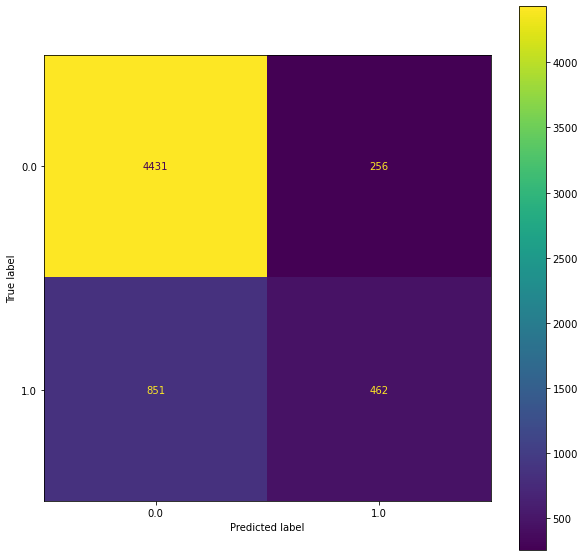

In [109]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(rf, X_test_scaled, y_test, ax=ax);

In [110]:
y_preds_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.64      0.35      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



### Optimization <a name="opt"></a>

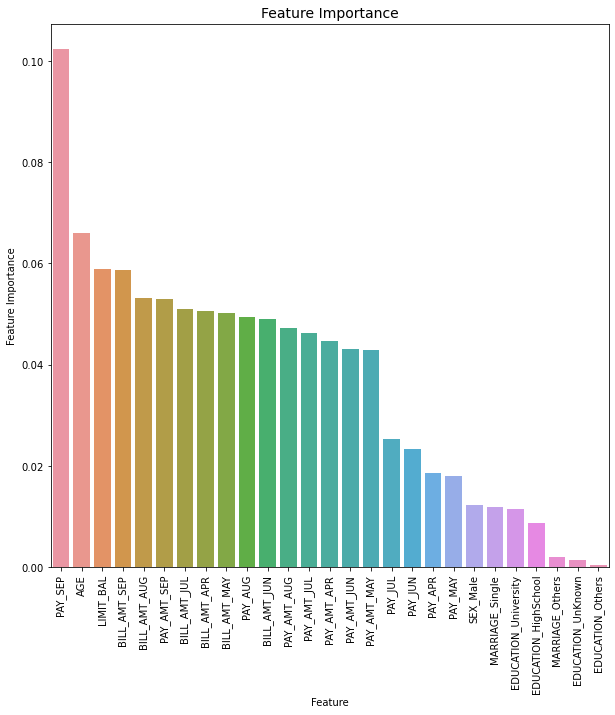

In [111]:
temp = pd.DataFrame({'Feature': list(X.columns), 'Feature Importance': rf.feature_importances_})
temp = temp.sort_values(by="Feature Importance", ascending=False)

plt.figure(figsize=(10,10))
plt.title('Feature Importance', fontsize=14)
s=sns.barplot(x='Feature', y='Feature Importance', data=temp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show();

In [112]:
# Update dataframe
X = X.iloc[:, np.argsort(rf.feature_importances_,)[7:]]

### Hyperparamter Tuning<a name="hyp"></a>

In [113]:
# Define parameter values that should be searched
bootstrap = [True, False]
max_features = ['auto','sqrt'] # The number of features to consider when looking for the best split.
min_samples_leaf = [1,2,4] # The minimum number of samples required to be at a leaf node.
min_samples_split = [2,6,10] # The minimum number of samples required to split an internal node.
n_estimators = [50,100,150,200] # The number of trees in the forest.
max_depth = [2,6,10,14, None] # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure.

In [114]:
# Specify "parameter distributions" rather than a "parameter grid"

param_dist = dict(n_estimators=n_estimators, max_depth = max_depth, bootstrap=bootstrap,
                  min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,
                  max_features=max_features)
print(param_dist)

{'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 6, 10, 12, None], 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [115]:
# n_iter controls the number of searches

rand = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=45)
rand.fit(X_train_scaled, y_train)

rand.cv_results_

{'mean_fit_time': array([1.85542576, 5.98670089, 1.82354624, 3.71178041, 2.38531945,
        1.14624164, 2.41693175, 2.50345376, 2.02712417, 2.62134297]),
 'std_fit_time': array([0.03112513, 0.20984559, 0.07646973, 0.14897039, 0.08129785,
        0.0284067 , 0.22674351, 0.22573839, 0.18158243, 0.24935307]),
 'mean_score_time': array([0.02165117, 0.06921909, 0.02872009, 0.04377966, 0.02163181,
        0.01775427, 0.03570318, 0.02852776, 0.02264018, 0.03435073]),
 'std_score_time': array([0.0006355 , 0.00513574, 0.00417123, 0.00359573, 0.00063449,
        0.00087241, 0.00251206, 0.00303145, 0.00134241, 0.01252675]),
 'param_n_estimators': masked_array(data=[50, 150, 150, 150, 100, 100, 200, 100, 50, 150],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 2, 5, 5, 10, 5, 2, 2, 5, 5],
              mask=[False, False, False, Fals

In [116]:
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (f"Mean score: {model_grid.cv_results_['mean_test_score'][best_k]}",
           f"Std: {model_grid.cv_results_['std_test_score'][best_k]}")

In [117]:
# Examine the best model
print(rand.best_score_)
print(rand.best_params_)
get_best_model(rand)

0.8215555555555556
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
Mean score: 0.8127777777777778 Std: 0.005588789484426352


In [118]:
print("Random Forest with the following parameters:\n")
print(rand.best_params_)

Random Forest with the following parameters:

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}


### Check for Overfitting

In [119]:
# features and target
X = df.drop(["Default"], axis=1)
y = df["Default"]

# encode categorical

X = encode_cats(categoricals, numericals)

# Split data
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, y)

# Scale
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)

# Model score
rf = model_score('RF', RandomForestClassifier(**rand.best_params_),
                 X_train_scaled, X_val_scaled, X_test_scaled,
                 y_train, y_val, y_test, test=True)

Calculating validation score...
RF accuracy score: 0.8153
RF elapsed time: 2.421875

Calculating test score...
RF accuracy score: 0.8178



In [156]:
predRF = rf.predict(X)

In [168]:
out = pd.DataFrame(predRF)

In [170]:
out.rename(columns={0:'Default_Pred'}, inplace=True)

Default_Pred
0               1.0
1               1.0
2               0.0
3               0.0
4               0.0
...             ...
29995           0.0
29996           0.0
29997           0.0
29998           0.0
29999           0.0

[30000 rows x 1 columns]

In [176]:
def_class = {1:'yes',0:'no'}
out.Default_Pred = [def_class[item] for item in out.Default_Pred]

In [177]:
out.to_csv('out.csv', index=False)

In [178]:
draw = pd.read_csv('out.csv')

## Discussion <a name="disc"></a>

The objective of the business problem was to help risk managmnet identify who is more possible to be a Default. This has been achieved by first making use of CCs data to identify the data parameters that are relevant to each others and drop that are irrelevant. After selecting the sufficient data, here I used several models to test and see who is more accurate and not biased. After using Multiple Linear Regression, K-NN, SVM, Random Forest, Decision Tree and Logistic Regression, **SVM** and **RF** gave the best percision. Here I chose the **RF** as it have less computational time.